In [1]:
from __future__ import unicode_literals
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import csv

# Paths del binario que mide tiempos
medidor = './tiempos'
unidad = 'micros'

# Variables de estadísticos
muestras = 5


# Tiempos GRID exhaustivo variando C

In [48]:
ai = '-gre 500'
NN = [1,2,3,4]
MM = [1,2,3,4]
# C de 1 a min(M,N)

tiempos = np.zeros((4,4,4))

for N in NN:
    for M in MM:
        for C in range(1,min(N,M)+1):
            tt = []
            for k in range(muestras):
                P = N*M
                command = medidor+' '+str(N)+' '+str(M)+' '+str(C)+' '+str(P)
                command+=' -t '+unidad+' '+ai
                tt.append(float(os.popen(command).read()))
            print(command,np.min(tt))
            tiempos[N-1][M-1][C-1] = np.min(tt)
            
np.save('save/tiempos_grid_exh.npy',tiempos)


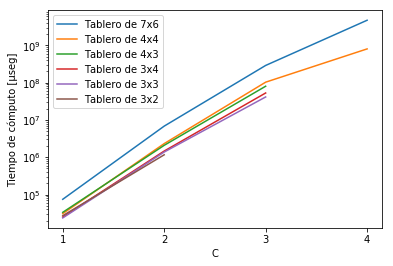

In [71]:
tiempos = np.load('save/tiempos_grid_exh.npy')

# Este lo hago a mano
tiempos76 = [74463,6.8301e+06, 2.89665e+08, 4.72078e+09]

CC = [1,2,3,4]
# Format plot
plt.figure()
plt.xticks(CC)
plt.yscale('log')
plt.xlabel('C')
plt.ylabel('Tiempo de cómputo [μseg]')

# Data
plt.plot(CC, tiempos76, label="Tablero de 7x6")
plt.plot(CC,tiempos[3][3],label='Tablero de 4x4')
plt.plot(CC[:-1],tiempos[3][2][:-1],label='Tablero de 4x3')
plt.plot(CC[:-1],tiempos[2][3][:-1],label='Tablero de 3x4')
plt.plot(CC[:-1],tiempos[2][2][:-1],label='Tablero de 3x3')
plt.plot(CC[:-2],tiempos[2][1][:-2],label='Tablero de 3x2')
plt.legend(loc='best')
plt.savefig('plots/grid_ext_tiempos.pdf')
plt.show()

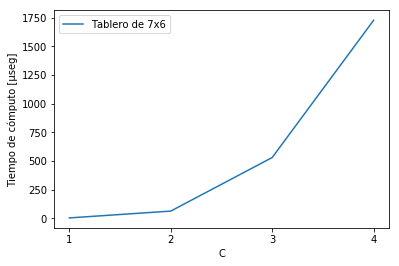

In [73]:
tiempos = np.load('save/tiempos_grid_exh.npy')

# Este lo hago a mano
tiempos76 = [74463,6.8301e+06, 2.89665e+08, 4.72078e+09]
tiempos76 = [tiempos76[i-1]/(7*(5**(i+4))) for i in range(1,len(tiempos76)+1)]
tiempos76
CC = [1,2,3,4]
# Format plot
plt.figure()
plt.xticks(CC)
# plt.yscale('log')
plt.xlabel('C')
plt.ylabel('Tiempo de cómputo [μseg]')

# Data
plt.plot(CC, tiempos76, label="Tablero de 7x6")
# plt.plot(CC,tiempos[3][3],label='Tablero de 4x4')
# plt.plot(CC[:-1],tiempos[3][2][:-1],label='Tablero de 4x3')
# plt.plot(CC[:-1],tiempos[2][3][:-1],label='Tablero de 3x4')
# plt.plot(CC[:-1],tiempos[2][2][:-1],label='Tablero de 3x3')
# plt.plot(CC[:-2],tiempos[2][1][:-2],label='Tablero de 3x2')
plt.legend(loc='best')
plt.show()

## Veamos ahora para N=4, M=4 y c variado, distintas discretizaciones

In [131]:
data = pd.DataFrame([], index=[5,7,9,11])
data['1'] = [41291,538104,1.07442e+06,3.60991e+06]
data['2'] = [2.35729e+06,2.45923e+07,1.48847e+08,7.29969e+08]
data['3'] = [1.7721e+08,1.67822e+09,1.15344e+10,0]
data.to_pickle('save/tiempos_grid_tamanio.npy')

#para tablero de 3x3
data3 = pd.DataFrame([], index=[5,7,9,11])
data3['1'] = [32137,195628,785913,2.64341e+06]
data3['2'] = [1.4034e+06,1.45899e+07,8.9295e+07,3.5131e+08]

display(data)
display(data3)

,1,2,3
5,41291.0,2357290.0,1.772100e+08
7,538104.0,24592300.0,1.678220e+09
9,1074420.0,148847000.0,1.153440e+10
11,3609910.0,729969000.0,0.000000e+00


,1,2
5,32137.0,1403400.0
7,195628.0,14589900.0
9,785913.0,89295000.0
11,2643410.0,351310000.0


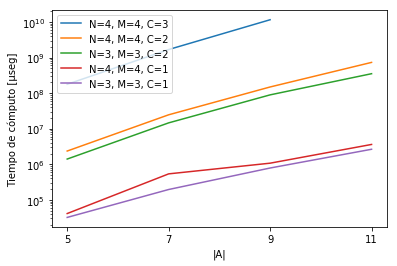

In [172]:
# Data
data = pd.read_pickle('save/tiempos_grid_tamanio.npy')
plt.plot(data["3"][:-1], label="N=4, M=4, C=3")
plt.plot(data["2"], label="N=4, M=4, C=2")
plt.plot(data3["2"], label="N=3, M=3, C=2")
plt.plot(data["1"], label="N=4, M=4, C=1")
plt.plot(data3["1"], label="N=3, M=3, C=1")



plt.legend(loc='best')
plt.yscale('log')
plt.xlabel('|A|')
plt.xticks(data.index)
plt.ylabel('Tiempo de cómputo [μseg]')
plt.savefig('plots/grid_ext_tamanio.pdf')

plt.show()


## Busqueda Local solo victorias, vemos cuanto logra avanzar en funcion de steps


In [2]:
steps = [12.5,25,50,75,100,125,150,175,200,225,250]
cant_steps = [ 2000/step for step in steps]
# flashie y los corri a manopla pero ya estan
filenames = ['save/grid/vict_{}.txt'.format(step) for step in steps]
means = []
stds = []

In [3]:
for i in range(len(steps)):
    data = pd.read_csv(filenames[i],sep='\n', squeeze=True, header=None)
    data = data[data<np.percentile(data, 98)]
    means.append(data.mean())
    stds.append(data.std())

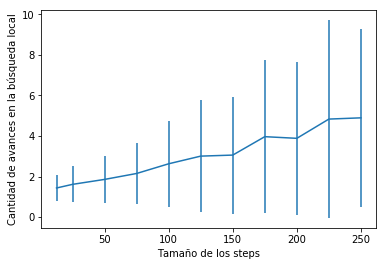

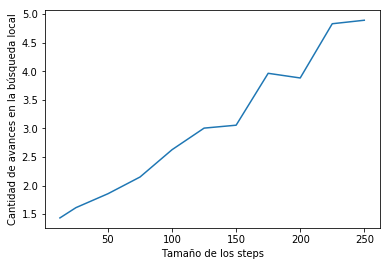

In [4]:
plt.errorbar(steps,means, yerr=stds)
# plt.legend()
plt.xlabel('Tamaño de los steps')
plt.ylabel('Cantidad de avances en la búsqueda local')
plt.savefig('plots/grid/victoria_steps_err.pdf')
plt.show()

plt.plot(steps,means)
plt.xlabel('Tamaño de los steps')
plt.ylabel('Cantidad de avances en la búsqueda local')
plt.savefig('plots/grid/victoria_steps.pdf')
plt.show()

#### Ahora en funcion de la cantidad de step en el rango

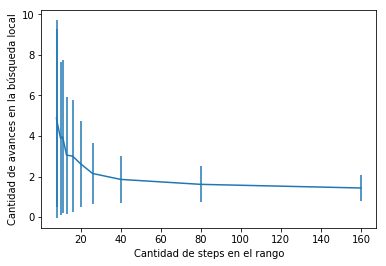

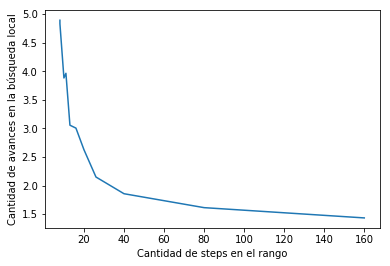

In [5]:
plt.errorbar(cant_steps,means, yerr=stds)
# plt.legend()
plt.xlabel('Cantidad de steps en el rango')
plt.ylabel('Cantidad de avances en la búsqueda local')
plt.savefig('plots/grid/victoria_cant_steps_err.pdf')
plt.show()

plt.plot(cant_steps,means)
plt.xlabel('Cantidad de steps en el rango')
plt.ylabel('Cantidad de avances en la búsqueda local')
plt.savefig('plots/grid/victoria_cant_steps.pdf')
plt.show()

## Busqueda Local tambien con empates, vemos cuanto logra avanzar en funcion de steps


In [6]:
steps = [12.5,25,50,75,100,125,150,175,200,225,250]
cant_steps = [ 2000/step for step in steps]
# flashie y los corri a manopla pero ya estan
filenames = ['save/grid/emp_{}.txt'.format(step) for step in steps]
means_emp = []
stds_emp = []

In [7]:
for i in range(len(steps)):
    data = pd.read_csv(filenames[i],sep='\n', squeeze=True, header=None)
    data = data[data<np.percentile(data, 98)]
    means_emp.append(data.mean())
    stds_emp.append(data.std())

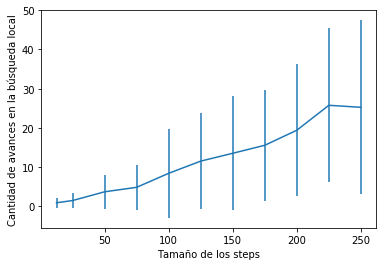

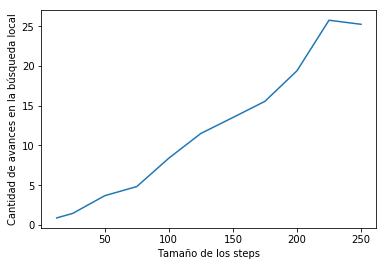

In [8]:
plt.errorbar(steps,means_emp, yerr=stds_emp)
# plt.legend()
plt.xlabel('Tamaño de los steps')
plt.ylabel('Cantidad de avances en la búsqueda local')
plt.savefig('plots/grid/empate_steps_err.pdf')
plt.show()

plt.plot(steps,means_emp)
plt.xlabel('Tamaño de los steps')
plt.ylabel('Cantidad de avances en la búsqueda local')
plt.savefig('plots/grid/empate_steps.pdf')
plt.show()

#### Ahora en funcion de la cantidad de step en el rango

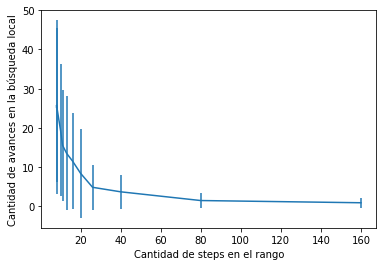

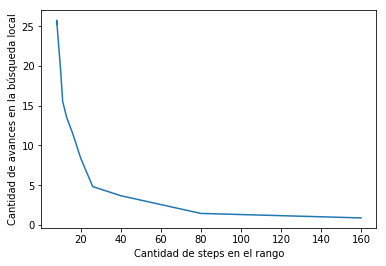

In [9]:
plt.errorbar(cant_steps,means_emp, yerr=stds_emp)
# plt.legend()
plt.xlabel('Cantidad de steps en el rango')
plt.ylabel('Cantidad de avances en la búsqueda local')
plt.savefig('plots/grid/empate_cant_steps_err.pdf')
plt.show()

plt.plot(cant_steps,means_emp)
plt.xlabel('Cantidad de steps en el rango')
plt.ylabel('Cantidad de avances en la búsqueda local')
plt.savefig('plots/grid/empate_cant_steps.pdf')
plt.show()

### Ahora ponemos el de empates y victorias en el mismo grafico

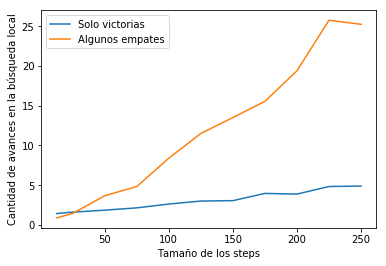

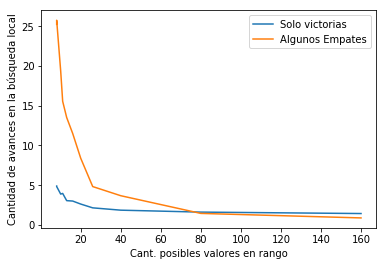

In [14]:
plt.plot(steps,means, label="Solo victorias")
plt.plot(steps,means_emp, label="Algunos empates")
plt.legend()
plt.xlabel('Tamaño de los steps')
plt.ylabel('Cantidad de avances en la búsqueda local')
plt.savefig('plots/grid/both_steps.pdf')
plt.show()

plt.plot(cant_steps,means, label="Solo victorias")
plt.plot(cant_steps,means_emp, label="Algunos Empates")
plt.legend()
plt.xlabel('Cant. posibles valores en rango')
plt.ylabel('Cantidad de avances en la búsqueda local')
plt.savefig('plots/grid/both_cant_steps.pdf')
plt.show()